In [46]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.image as mpimg
from matplotlib import rcParams
import ipyplot
%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 25 ,15

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

##### Set style options here #####
sns.set_style("whitegrid")  # "white","dark","darkgrid","ticks"
boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
flierprops = dict(marker='o', markersize=1,
                  linestyle='none')
whiskerprops = dict(color='#00145A')
capprops = dict(color='#00145A')
medianprops = dict(linewidth=1.5, linestyle='-', color='#01FBEE')
#financial_fraud_score_pipedd.csv   0.8

#financial_fraud_score_pipedd2.csv   2.8
scores = raw_scores= json.load(open('financial_fraud_score_pipedd.csv','r'))

<AxesSubplot:>

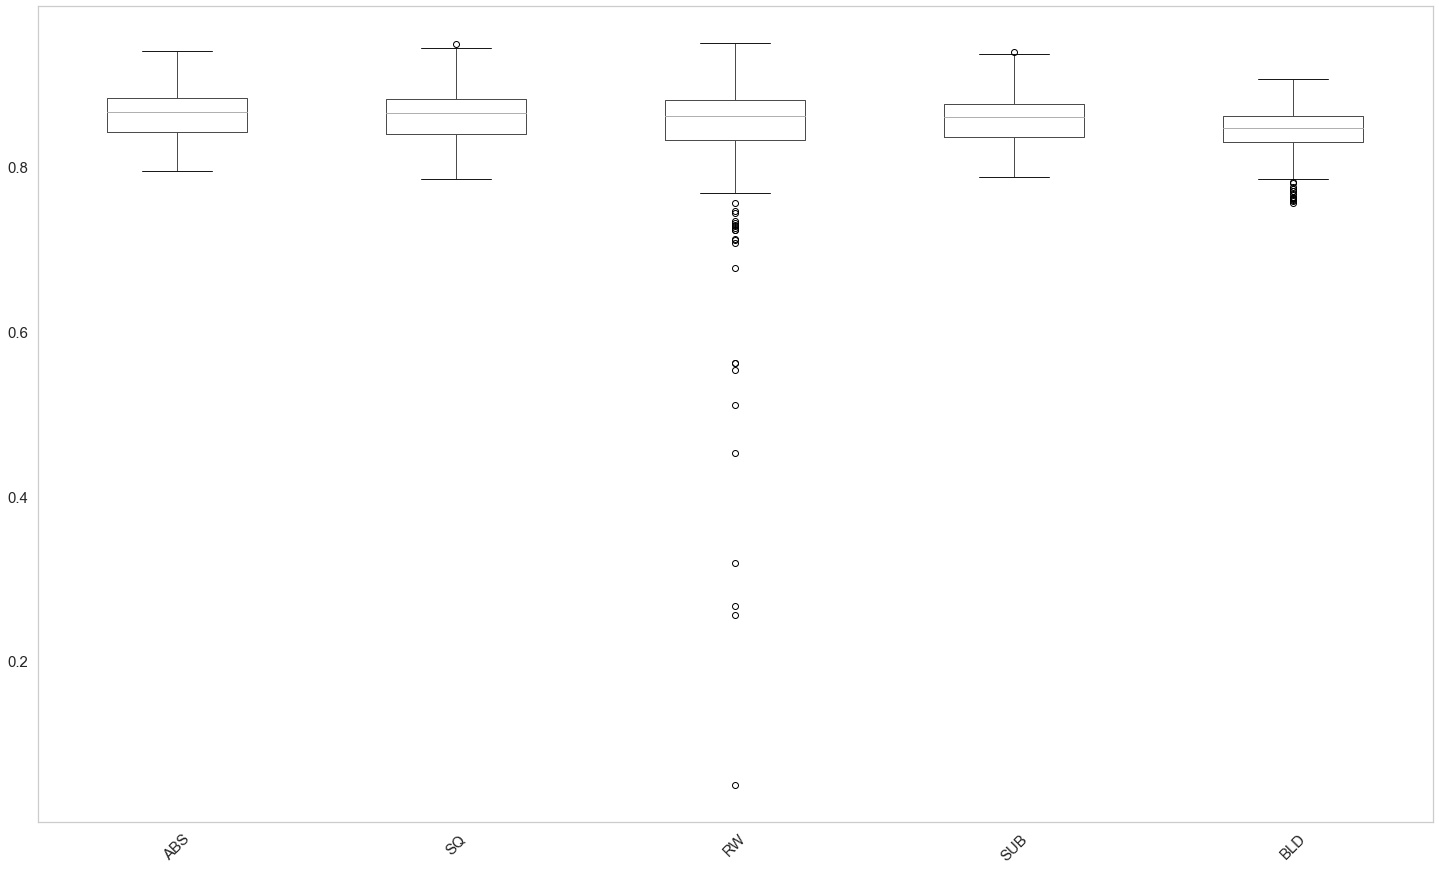

In [47]:
pd.DataFrame(scores['LF'],).boxplot(grid=False,
                                    rot=45, fontsize=15)  

In [27]:
zb=pd.DataFrame(scores['MSE'],)
zb_lf=pd.DataFrame(scores['LF'],)
zb_lae=pd.DataFrame(scores['LAE'],)
zb.describe().round(4)

,ABS,SQ,RW,SUB,BLD
count,600.0000,600.0000,600.0000,600.0000,600.0000
mean,0.0446,0.0460,1.3116,0.0489,0.0458
std,0.0168,0.0187,29.0672,0.0161,0.0161
min,0.0113,0.0073,0.0084,0.0125,0.0124
25%,0.0322,0.0336,0.0327,0.0384,0.0361
50%,0.0410,0.0424,0.0435,0.0461,0.0422
75%,0.0571,0.0594,0.0655,0.0612,0.0526
max,0.0950,0.1187,711.7603,0.1014,0.1132


SUB



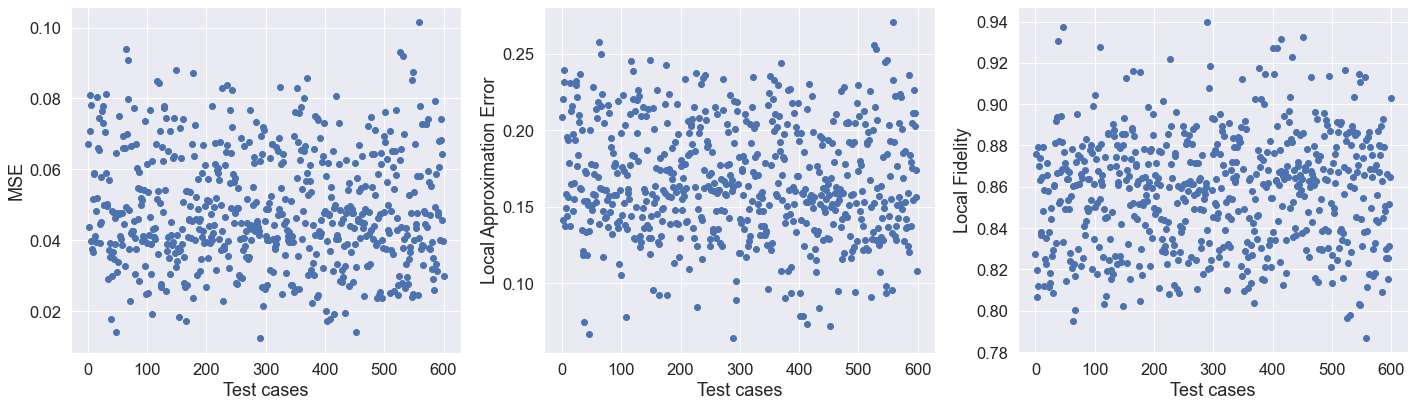

BLD



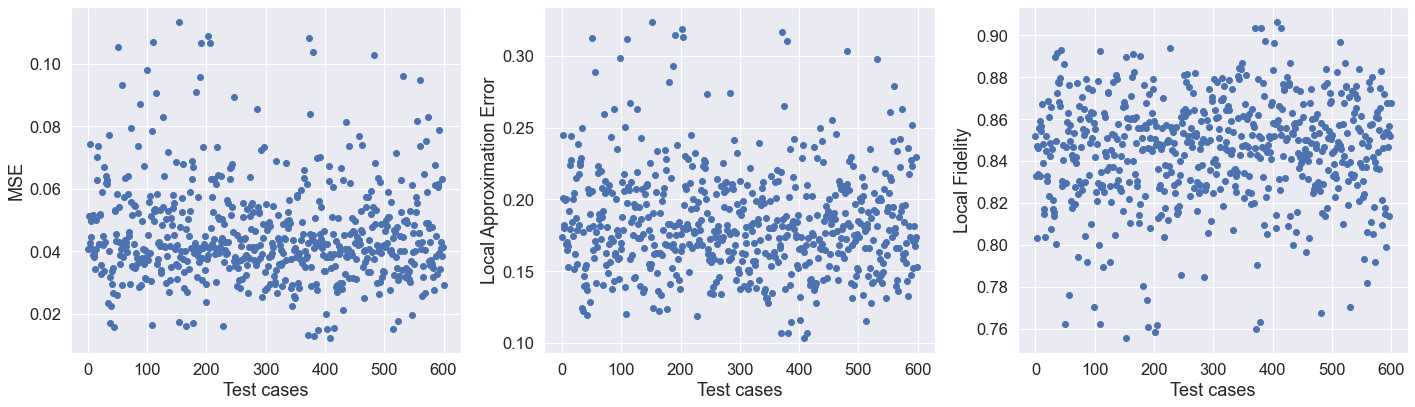

ABS



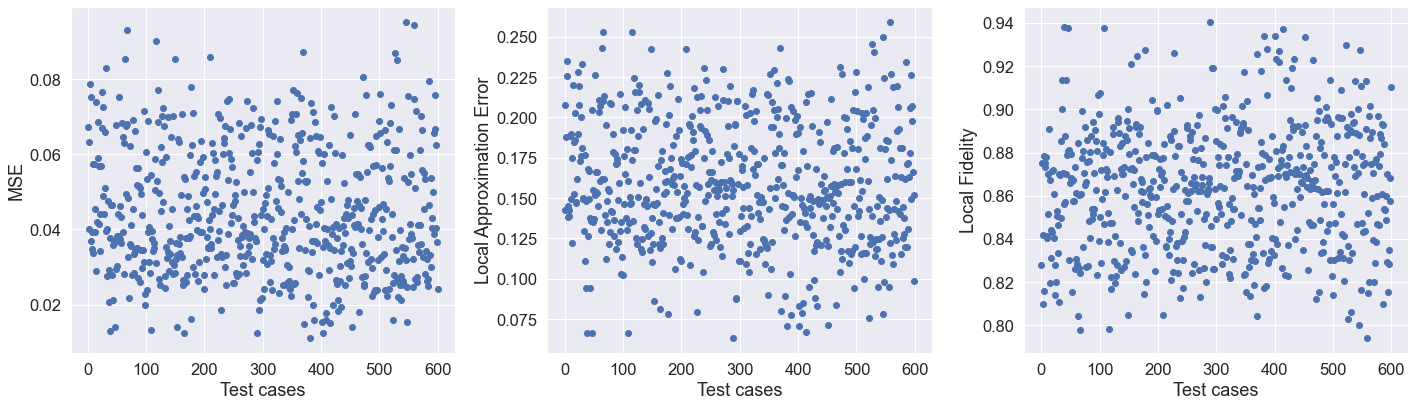

SQ



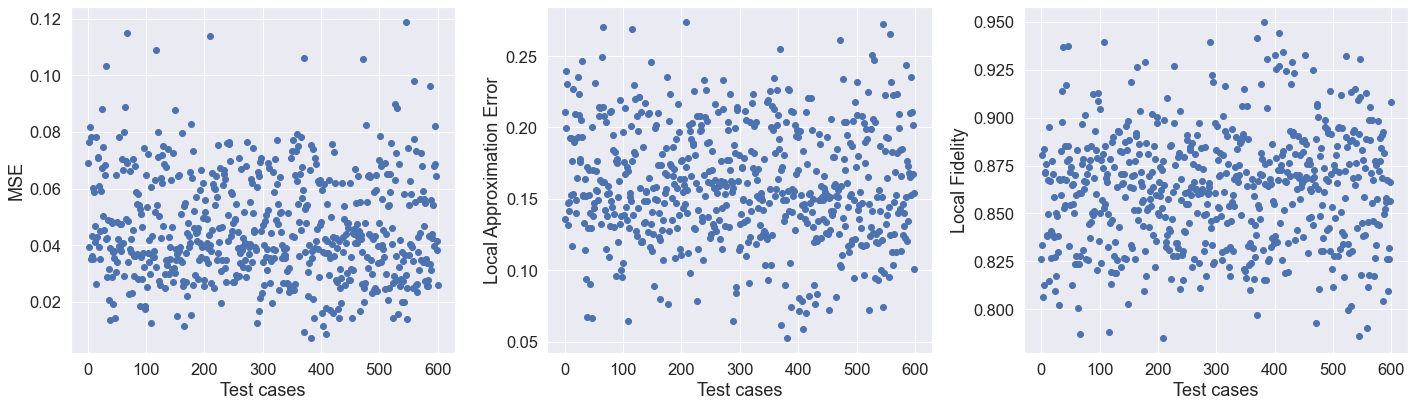

RW



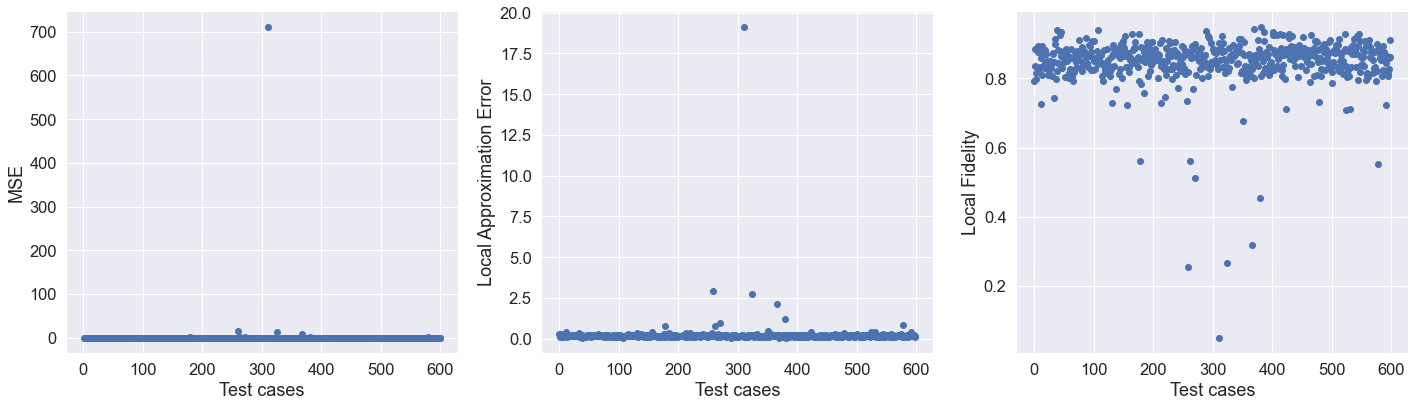

In [55]:
sns.set(font_scale=1.5)
# Get the scatter plot showing the spread of the scores for each test case
for method in ['SUB','BLD','ABS','SQ','RW']:
    print(method)
    fig, axe = plt.subplots(ncols=3,figsize=(20,6))
    axe[0].scatter(range(1,len(zb[method])+1),zb[method])
    #axe[0].set_title('MSE')
    axe[1].scatter(range(len(zb[method])),zb_lae[method])
    #axe[1].set_title('Local Approximation Error')
    axe[2].scatter(range(len(zb[method])),zb_lf[method])
    #axe[2].set_title('Local Fidelity')
    axe[0].set_xlabel('Test cases')
    axe[1].set_xlabel('Test cases')
    axe[2].set_xlabel('Test cases')
    
    axe[0].set_ylabel('MSE')
    axe[1].set_ylabel('Local Approximation Error')
    axe[2].set_ylabel('Local Fidelity')
    
    print()
    plt.tight_layout()
    plt.pause(0.002)
#axe[2].scatter([len(zb['SUB'])/2],[ pd.DataFrame(raw_scores['MSE'],).median().loc['BLD']])

In [64]:

u

,Absolute,Squared,Raw,Baseline,Blind-Level
0,0.828044,0.826000,0.793859,0.827322,0.852052
1,0.875330,0.880299,0.886307,0.876099,0.832628
2,0.841757,0.833604,0.837420,0.819491,0.803167
3,0.809903,0.806629,0.815749,0.806848,0.847338
4,0.815951,0.812516,0.798167,0.812001,0.846057
...,...,...,...,...,...
595,0.828641,0.826030,0.817016,0.825619,0.853310
596,0.834958,0.831945,0.826810,0.831244,0.856689
597,0.857672,0.856327,0.858105,0.851882,0.813550
598,0.868339,0.866380,0.863426,0.864769,0.851963


<AxesSubplot:>

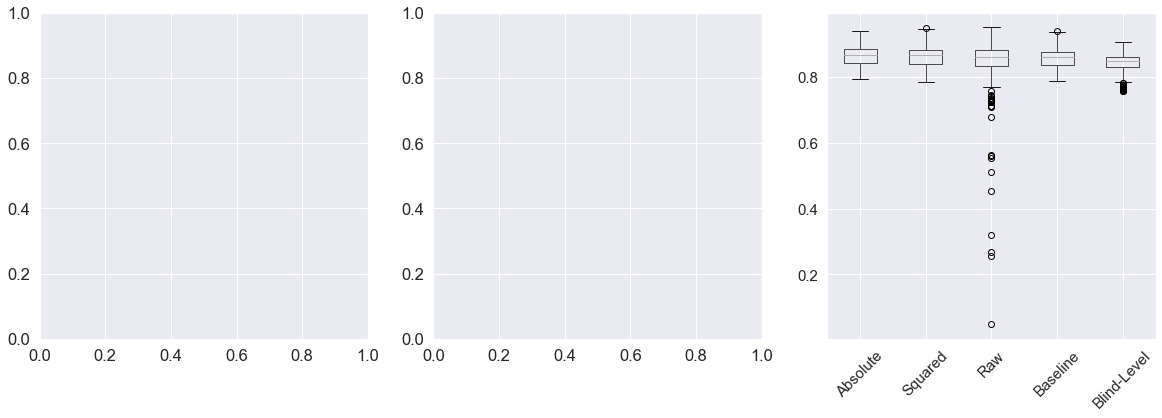

In [66]:
fig, axe = plt.subplots(ncols=3,figsize=(20,6))
u=pd.DataFrame(raw_scores['LF'])
u.columns= ['Absolute','Squared','Raw','Baseline','Blind-Level']
u.boxplot( rot=45, fontsize=15)  

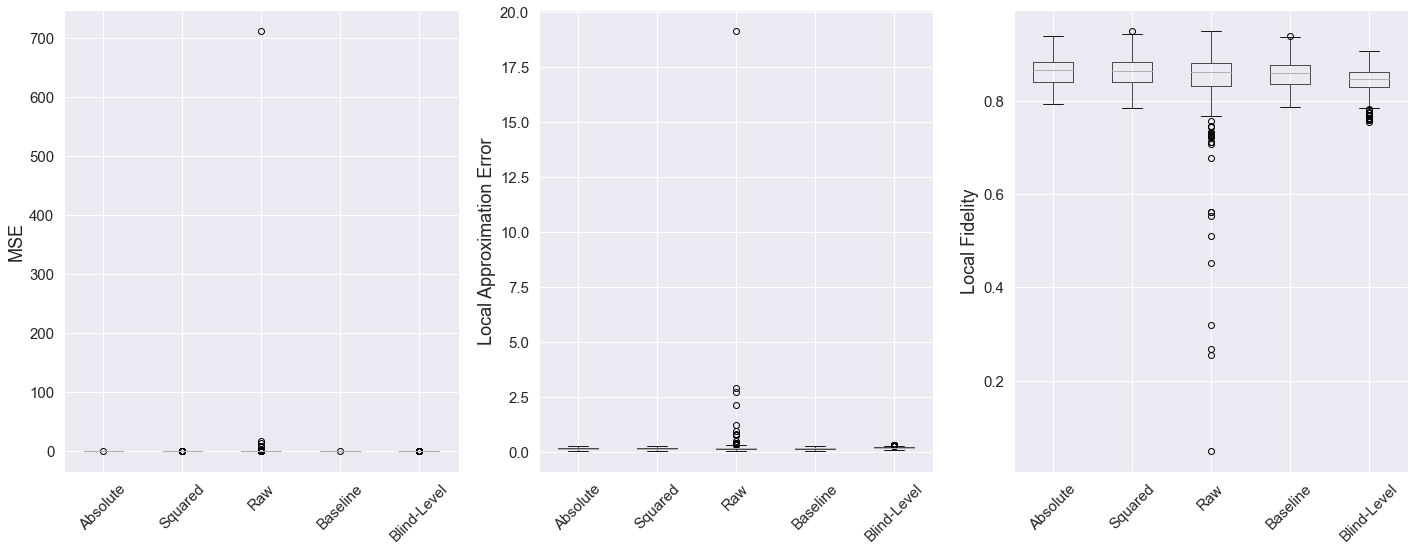

In [69]:
sns.set(font_scale=1.5)
# Get the scatter plot showing the spread of the scores for each test case
fig, axe = plt.subplots(ncols=3,
                            figsize=(20,8))
for idx,(method,name) in enumerate(zip(['MSE','LAE','LF'],['MSE','Local Approximation Error','Local Fidelity'])):
    #print(method)
    
    
    u=pd.DataFrame(raw_scores[method])
    u.columns= ['Absolute','Squared','Raw','Baseline','Blind-Level']
    u.boxplot( rot=45, fontsize=15,ax=axe[idx]) 
    axe[idx].set_ylabel(name)
    
    print()
    
    #plt.pause(0.002)
plt.tight_layout()

In [72]:
nb_test_cases = 600

In [91]:
fidelity_performance_proportion = pd.DataFrame(np.int32(np.array(lf_scores['SQ'])>np.array(lf_scores['RW'])).reshape(-1), columns=['who_won'])
fidelity_performance_proportion[['who_won']] = np.where(fidelity_performance_proportion[['who_won']]==1,"SQ","RW")

In [92]:
fidelity_performance_proportion.value_counts(normalize=True)

who_won
RW         0.516667
SQ         0.483333
dtype: float64

In [83]:
from collections import Counter
# Get the number of time each explanation method achieved a better score than the other
lf_scores = raw_scores['LF']

methods = list(raw_scores['LF'].keys())
better_than = np.zeros((len(methods),len(methods)))
visited = set()
for i,mi in enumerate(methods):
    for j, mj in enumerate(methods):
        if mj== mi:
            continue
        if (i,j) in visited:
            continue
        else:
            fidelity_performance_proportion = pd.DataFrame(np.int32(np.array(lf_scores[mi])>np.array(lf_scores[mj])).reshape(-1), columns=['who_won'])
            fidelity_performance_proportion[['who_won']] = np.where(fidelity_performance_proportion[['who_won']]==1,"Mi","Mj")
            scores = dict(Counter(fidelity_performance_proportion[['who_won']].values.reshape(-1)))
            scores = pd.Series({f:scores.get(f,0)/nb_test_cases for f in ["Mi","Mj"] })
            
            #print(scores)
            
            better_than[i,j] = scores.loc['Mi']
            better_than[j,i] = scores.loc['Mj']
            visited.add((i,j))
            
            
    
lf_lae_performance=pd.DataFrame(better_than,columns=['Absolute',
                                  'Squared',
                                  'Raw',
                                  'Sub-model-wise',
                                  'Blind'],
                                index=['Absolute',
                                       'Squared',
                                       'Raw',
                                       'Sub-model-wise','Blind'])
lf_lae_performance.round(3)*100

,Absolute,Squared,Raw,Sub-model-wise,Blind
Absolute,0.0,78.2,55.7,92.3,67.8
Squared,21.8,0.0,48.3,91.0,66.0
Raw,44.3,51.7,0.0,59.0,61.7
Sub-model-wise,7.7,9.0,41.0,0.0,63.5
Blind,32.2,34.0,38.3,36.5,0.0


In [80]:
from collections import Counter
# Get the number of time each explanation method achieved a better score than the other
lf_scores = raw_scores['MSE']

methods = list(raw_scores['MSE'].keys())
better_than = np.zeros((len(methods),len(methods)))
visited = set()
for i,mi in enumerate(methods):
    for j, mj in enumerate(methods):
        if mj== mi:
            continue
        if (i,j) in visited:
            continue
        else:
            fidelity_performance_proportion = pd.DataFrame(np.int32(np.array(lf_scores[mi])<np.array(lf_scores[mj])).reshape(-1), columns=['who_won'])
            fidelity_performance_proportion[['who_won']] = np.where(fidelity_performance_proportion[['who_won']]==1,"Mi","Mj")
            scores = dict(Counter(fidelity_performance_proportion[['who_won']].values.reshape(-1)))
            scores = pd.Series({f:scores.get(f,0)/nb_test_cases for f in ["Mi","Mj"] })
            
            #print(scores)
            
            better_than[i,j] = scores.loc['Mi']
            better_than[j,i] = scores.loc['Mj']
            visited.add((i,j))
            
            
    
lf_lae_performance=pd.DataFrame(better_than,columns=['Absolute',
                                  'Squared',
                                  'Raw',
                                  'Sub-model-wise',
                                  'Blind'],
                                index=['Absolute',
                                       'Squared',
                                       'Raw',
                                       'Sub-model-wise','Blind'])
lf_lae_performance.round(3)*100

,Absolute,Squared,Raw,Sub-model-wise,Blind
Absolute,0.0,78.3,50.2,91.0,55.8
Squared,21.7,0.0,43.2,74.8,53.8
Raw,49.8,56.8,0.0,60.7,48.5
Sub-model-wise,9.0,25.2,39.3,0.0,46.2
Blind,44.2,46.2,51.5,53.8,0.0


In [76]:
lf_lae_performance#.to_markdown()

,Absolute,Squared,Raw,Sub-model-wise,Blind
Absolute,0.000000,0.781667,0.556667,0.923333,0.678333
Squared,0.218333,0.000000,0.483333,0.910000,0.660000
Raw,0.443333,0.516667,0.000000,0.590000,0.616667
Sub-model-wise,0.076667,0.090000,0.410000,0.000000,0.635000
Blind,0.321667,0.340000,0.383333,0.365000,0.000000


In [ ]:
fig,ax = 
plt.scatter(range(len(zb['BLD'])),zb['BLD'])
plt.scatter([len(zb['SQ'])/2],[ pd.DataFrame(raw_scores['LF'],).median().loc['BLD']])

In [11]:
zb=pd.DataFrame(scores['LAE'],)
zb.describe().round(4)

,ABS,SQ,RW,SUB,BLD
count,600.0000,600.0000,600.0000,600.0000,600.0000
mean,0.1587,0.1604,0.2194,0.1669,0.1843
std,0.0383,0.0406,0.7980,0.0375,0.0365
min,0.0636,0.0530,0.0527,0.0643,0.1037
25%,0.1323,0.1329,0.1350,0.1405,0.1614
50%,0.1547,0.1557,0.1604,0.1615,0.1797
75%,0.1881,0.1903,0.2020,0.1967,0.2049
max,0.2588,0.2735,19.1481,0.2706,0.3233


In [12]:
zb=pd.DataFrame(scores['LF'],)
zb.describe().round(4)

,ABS,SQ,RW,SUB,BLD
count,600.0000,600.0000,600.0000,600.0000,600.0000
mean,0.8640,0.8628,0.8500,0.8578,0.8452
std,0.0285,0.0302,0.0716,0.0276,0.0254
min,0.7944,0.7852,0.0496,0.7870,0.7557
25%,0.8417,0.8401,0.8320,0.8356,0.8299
50%,0.8661,0.8653,0.8618,0.8609,0.8477
75%,0.8832,0.8827,0.8810,0.8768,0.8611
max,0.9402,0.9497,0.9499,0.9396,0.9061


In [32]:
# Check if the performance difference vs the Sub-model-wise is significant

In [ ]:
### Significance test with respect to the metrics

In [33]:
ttest_ind(raw_scores['LAE']['SQ'],raw_scores['LAE']['SUB'])

Ttest_indResult(statistic=-2.902120622133403, pvalue=0.0037742868225091293)

In [13]:

from scipy.stats import ttest_ind
for metric in ['MSE','LAE','LF']:
    print( ttest_ind(scores[metric]['ABS'],scores[metric]['SUB']).pvalue)

6.952764704276781e-06
0.00018196628729225158
0.0001622176680495213


In [14]:
from scipy.stats import ttest_ind
for metric in ['MSE','LAE','LF']:
    print( ttest_ind(scores[metric]['SQ'],scores[metric]['SUB']).pvalue)

0.004864442265950261
0.0037742868225091293
0.002767966614480997


In [15]:
from scipy.stats import ttest_ind
for metric in ['MSE','LAE','LF']:
    print( 
          ttest_ind(scores[metric]['RW'],scores[metric]['SUB']).pvalue)

0.28750607949890317
0.10769851453021687
0.012016461790347955


In [17]:
from scipy.stats import ttest_ind
for metric in ['MSE','LAE','LF']:
    print( ttest_ind(scores[metric]['BLD'],scores[metric]['SUB']).pvalue)

0.0008448512873862002
1.0563712396358297e-15
3.374913399201336e-16
